<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/103_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 103: Polynomial Regression - Polynomials

### Teacher-Student Activities

So far we have learnt how certain features having relationship with the target variable affects a model the most. For the machine learning models created so far, we have assumed that relationship between the target and feature columns is **linear** which is not true all the time.

In this class you will learn about Polynomials and how they can be used to define relationships which are non-linear. You will also learn the concept of underfitting in machine learning models.

So let's jump to **Activity 1: Non-Linear Relationships**.



---

####Activity 1: Non Linear Relationships

A non-linear relationship is defined as a situation where the dependent variable is not linearly related to the independent variable. That means, here, the changes in the output do not change in direct proportion to changes in any of the inputs.

For example,

1. The height growth based on age.
2. Production of items based on number of workers
3. Increase in temperature based on $\text{CO}_2$ emissions
4. GDP of the nation in the last years.

Unlike linear relations, non-linear relations cannot be represented by a line. They are represented by a curve.

Therefore, in these examples, the variables `height` and `age` or `production` and `workers` or `temperature` and `CO2`, we will observe change in the dependent variable but it is dependent on the value of slope from the previous value to the current value.

Let's consider the Production example. The table below illustrates the number of items produced per day on the basis of the number of workers.

|No. of Workers|Items Produced|
|-|-|
|1|400|
|2|700|
|3|900|
|4|1000|
|5|1050|
|6|1075|


Let's create a graph to visualise the relation between the items produced (dependent variable) and number of workers (independent variable).




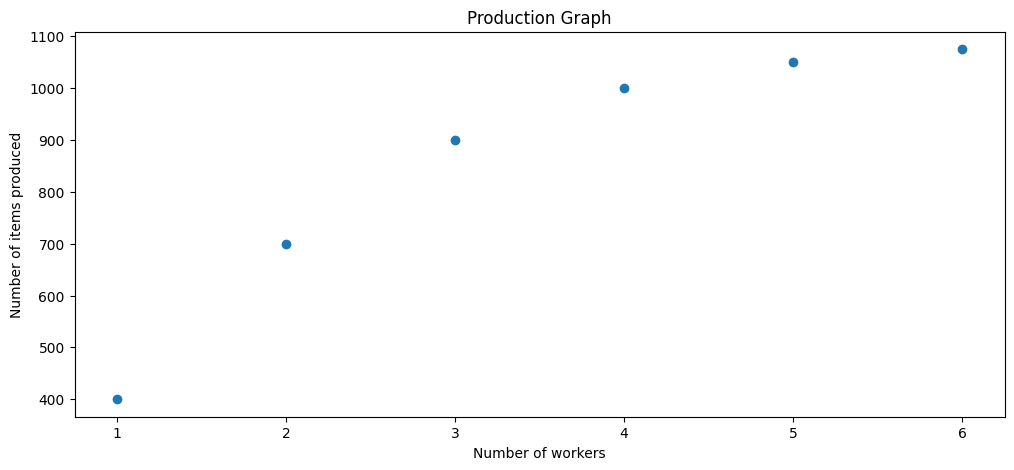

In [ ]:
# S1.1: Create a scatter plot between number of workers and number of items produced.
import numpy as np
import matplotlib.pyplot as plt

# Create an array for number of workers
n_workers = np.arange(1,7)

# Create an array for number of items produced
n_items = np.array([400, 700, 900, 1000, 1050, 1075])

# Plot a scatter plot to visualize the Production graph
plt.figure(figsize=(12,5))
plt.title(label = "Production Graph")
plt.scatter(n_workers, n_items)
plt.xlabel("Number of workers")
plt.ylabel("Number of items produced")
plt.show()

From the output, you may observe that the two variables are undoubtedly correlated but the relationship doesn't look linear.

Let's create a Regression plot for the above relation to see if we can get the best fit regression line.

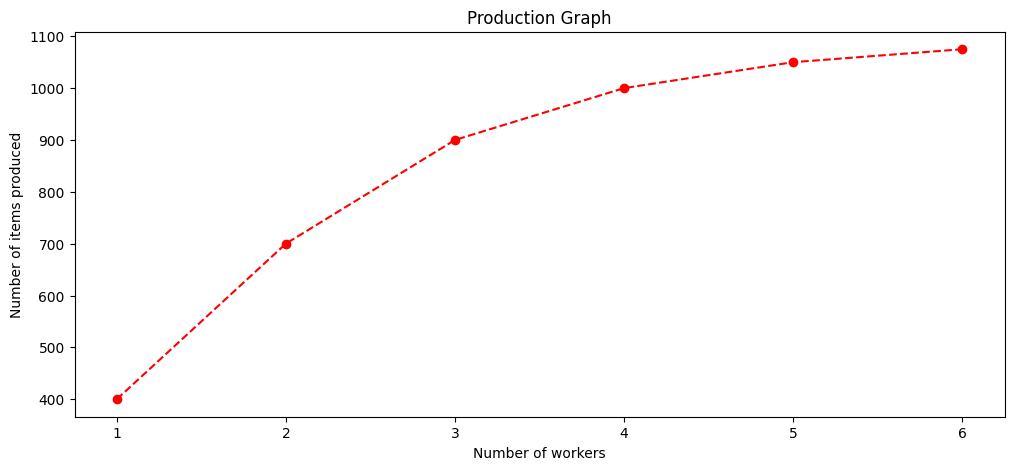

In [ ]:
# S1.2: Plot a regression plot to visualize the production graph
import seaborn as sns
plt.figure(figsize=(12,5))
plt.title(label = "Production Graph")
#sns.regplot(n_workers, n_items, color='green', scatter=False)
plt.plot(n_workers, n_items, 'o--r')
plt.xlabel("Number of workers")
plt.ylabel("Number of items produced")
plt.show()

Again, the regression plot output displays that the even the best fit linear regression line is not good enough to describe this relation, as the straight line is unable to capture the patterns in the data.

To overcome this problem, we will use polynomial regression which uses polynomial expressions to identify the non-linear relationship between independent and dependent variables.

Let's study in detail about the polynomial expressions.


---

####Activity 2: Polynomial Expressions

Polynomial expressions are a type of algebraic expressions. The word 'Polynomial' is a Greek word in which 'poly' means many and 'nomial' means terms.  That means a polynomial is an expression that contains one or many terms that can be added, subtracted, or multiplied but not divided.

Polynomials are composed of some or all of the following:

- **Constants**: These are numbers like $6$, $7$, $22$.

- **Variables**: These are letters like $x$, $xy$, $a$.

- **Exponents**: They are usually attached to variables but can also be found with a constant.

  e.g: $2$ in $x^2$ and $3$ in $5^3$ are exponents.

- **Arithmetic Operators**: These are used with variables as well as constants to perform common mathematical operations.

  e.g: $2x$ (multiplication), $2x + 5$ (multiplication and addition), $x - 10$ (subtraction).


Polynomials cannot contain the following:
1. Division by a variable.

  E.g:
  - $\frac{2y^2 + 7x}{5}$ is a polynomial as it contains division by a constant.

  - $\frac{2y^2 + 7x}{(1+x)}$ is not a polynomial as it contains division by a variable.
2. Negative exponents.

  e.g: $(2x + 5)^ {-4}$ is not a polynomial.

3. Fractional exponents.

  e.g: $(2x + 5)^ {\frac{1}{2}}$ is not a polynomial.

4. Radicals or Root.

  e.g: $\sqrt[3]{(2x + 5)}$ is not a polynomial.

A polynomial expression is denoted as $P(x)$ where $x$ is the unknown variable.

<center><img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/polynomialf.png' width = 300></center>



In the above image, the polynomial is denoted as $P(x)$ where $x$ represents the variable:
$x^2$, $-2x$, $3$ are terms of polynomial which consist of variables and constants.
- $x$ is the variable with exponents.
- $3$ is the constant.
- $1$, $-2$, are the coefficients of the first and second terms respectively.



A polynomial, in general, is of 3 types:
- Monomial: A polynomial with only a single term.
    - Examples: $2x^2$,  $7xy$,  $-7$, $10$.
- Binomial: A polynomial with exactly two terms.
    - Examples: $x^2 + 7$, $x^5 + 5x$.
- Trinomial: A polynomial with exactly three terms.
    - Examples: $x^3 + 4x + 7$, $4z^5 - 4x + 5$.

**Note:** A polynomial can have more than three terms but cannot be infinite.

In this class, we will be focusing on a polynomial with one variable.


**Degree of Polynomial:**
 Degree of a polynomial with one variable is the highest exponent of that variable.

For example:

1. $x^2 + 2x + 7$: Degree of polynomial is $2$.
2. $4x^5 - 4x + 5$ : Degree of polynomial is $5$.
3. $17x^2 - 4x^5 - 4x + 5$: Degree of polynomial is $5$.
4. $7x +3$: Degree of polynomial is $1$.

**Note:** The standard way of writing polynomial is to start with the highest degree first and lowest degree or constant at the end. But it is not a compulsion to write the polynomial in ascending or descending order of the degree.

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/53ea2286-5d9d-4d3e-a64f-1ad93a1edeaa.png width=750></center>

The NumPy library of Python has the `poly1d` class to define polynomials with one variable. The `poly1d` is a convenience class that is used to create and performs  operations on polynomials.

We can create a polynomial by calling the constructor of the `poly1d` class. It will return a polynomial based on the given coefficients of the variable.

> **Syntax:** `numpy.poly1d(c_or_r, r = False, variable = None)`

Where,
- `c_or_r`: Defines either of the following:
  - **Coefficients** of the polynomial in decreasing powers.

   For example, `poly1d([1, 2, 3])` represents $x^2 + 2x + 3$.
  - **Roots** of the polynomial (values where the polynomial evaluates to 0), if second parameter `r` is `True`.

    For example,  `poly1d([1, 2, 3], r = True)` represents $(x-1)(x-2)(x-3)$.

- `r`: By default, it is `False`. If `True`, the `c_or_r` parameter will represent the polynomial's roots.

- `variable`: Specifies the variable used to print the output of functions like `z`, `x`, `m` or any other character. By default it is `x`.

Let's create the following polynomial $x^2 + 5x + 6$ and print the output of the function:


In [ ]:
# T2.1: Create a polynomial 'x^2 + 5x + 6' using 'poly1d()' function.
import numpy as np

exp1 = np.poly1d([1, 5, 6])

print(f"The polynomial is: \n{exp1}")
print(f"The type of polynomial is: \n {type(exp1)}")

As we can observe, the polynomial $x^2 + 5x + 6$ is created by passing the list of coefficients `[1, 5, 6]` to the `poly1d()` function.

The first element of this list is considered as the coefficient of the highest exponent and the last element is considered as the constant.

**Note:** The polynomial is printed in two lines, one line for the exponents and the other for the coefficients and variables. Hence, for a clear output use a `\n` (newline) expression before printing the polynomials.

Let's create the below polynomials using the `poly1d()` function and observe the output again.

1. $1290$
2. $7x$
3. $-7x^4 + 8x^2 - 120$
4. $-17x^2 + 29x^5$



In [ ]:
# S2.1: Create the polynomials with the 'poly1d()' function and print the output.

# 1. Create a polynomial '1290' and print the output.
exp2 = np.poly1d([1290])
print(f"The polynomial is: \n{exp2}")
print(f"The type of polynomial is: \n {type(exp2)}")
# 2. Create a polynomial '7x' and print the output.
exp3 = np.poly1d([7,0])
print(f"The polynomial is: \n{exp3}")
print(f"The type of polynomial is: \n {type(exp3)}")
# 3. Create a polynomial '-7x^4 + 8x^2 - 120' and print the output.
exp4 = np.poly1d([-7,0,8,0,-120])
print(f"The polynomial is: \n{exp4}")
print(f"The type of polynomial is: \n {type(exp4)}")
# 4. Create a polynomial '-17x^2 + 29x^5' and print the output.
exp5 = np.poly1d([29,0,0,-17,0,0])
print(f"The polynomial is: \n{exp5}")
print(f"The type of polynomial is: \n {type(exp5)}")

The polynomial is: 
 
1290
The type of polynomial is: 
 <class 'numpy.poly1d'>
The polynomial is: 
 
7 x
The type of polynomial is: 
 <class 'numpy.poly1d'>
The polynomial is: 
    4     2
-7 x + 8 x - 120
The type of polynomial is: 
 <class 'numpy.poly1d'>
The polynomial is: 
    5      2
29 x - 17 x
The type of polynomial is: 
 <class 'numpy.poly1d'>


**Note:** If the polynomial expression does not contain a term of a degree in the standard order, we will pass the coefficient as `0`. For example, coefficients of polynomial $P(x) = 29x^4 - 17x^2$ are `[29 , 0, -17, 0 , 0]`.

As we can observe the polynomials are created with a coefficients list. Now let's try to create polynomials with a roots list.

The roots or solutions of the polynomial are the values of $x$ for which polynomial $P(x)$ is equal to zero. That means to solve a polynomial equation we have to find its roots.

For example, consider the following  polynomial $P(x)$.

$$ P(x) = x^2 + 5x + 6$$

Let's equate $P(x)$ to $0$ and solve it to find the value of $x$ by finding factors.
$$x^2 + 5x + 6 = 0$$
$$x^2 + 2x + 3x + 6 = 0$$
$$x(x+2) + 3(x+2) = 0$$
$$(x+2)(x+3) = 0$$

This means that the product of $(x+2)$ and $(x+3)$ will be zero i.e. $(x+2)(x+3)= 0$ when either $x = -2$ or $x = -3$.

Hence $P(x)$ has two roots: $x = -2$ and $x = -3$.

You can verify it by substituting $x = -2$ and $x = -3$ in polynomial $x^2 + 5x + 6$.


Let's create a polynomial with roots $(-2, -3)$ using the `poly1d()` function and observe the output.

In [ ]:
# S2.2: Create the polynomial with roots list [-2,-3] with 'poly1d()` function.
# Print the output and its type
var1_r=np.poly1d([-2,-3],r=True)
print(f"The polynomial is: \n{var1_r}")
print(f"The type of polynomial is: \n {type(var1_r)}")

The polynomial is: 
   2
1 x + 5 x + 6
The type of polynomial is: 
 <class 'numpy.poly1d'>


As we can observe, the polynomial created is $x^2 + 5x + 6$ which is the same as the polynomial $P(x)$ that we had solved. Also, the type is the same i.e. `'numpy.poly1d'`



**Properties of `poly1D` polynomial object**

Now let us  learn some properties or attributes of the `poly1d()` Polynomial object:

**1. Coefficients of Polynomial:**

The `coeff` or `c` attribute can be used to get the coefficient of a NumPy Polynomial.

> **Syntax:** `exp.coeffs` or `exp.c`

Where,

 `exp` is the `numpy.poly1d` variable.


Let's print the coefficients of the two polynomials below:
1. Polynomial having coefficients: `[1, 5, 6]`
2. Polynomial having roots: `[-2, -3]`


In [ ]:
# S2.3: Print the coefficients of the polynomials using the 'coeff' and 'c' attribute

# 1. Create polynomial 'x^2 + 5x + 6' using the coefficient list.
exp6 = np.poly1d([1,5,6])
print(f"The polynomial is: \n{exp6}")
print(f"The type of polynomial is: \n {type(exp6)}")
print(f"Polynomial: \n{exp6} \nCoefficients: {exp6.coeffs}")
# 2. Create the polynomial using roots list '[-2,-3]'
var2_r=np.poly1d([-2,-3],r=True)
print(f"The polynomial is: \n{var2_r}")
print(f"The type of polynomial is: \n {type(var2_r)}")
print(f"Polynomial: \n{var2_r} \nCoefficients: {var2_r.c}")

The polynomial is: 
   2
1 x + 5 x + 6
The type of polynomial is: 
 <class 'numpy.poly1d'>
Polynomial: 
   2
1 x + 5 x + 6 
Coefficients: [1 5 6]
The polynomial is: 
   2
1 x + 5 x + 6
The type of polynomial is: 
 <class 'numpy.poly1d'>
Polynomial: 
   2
1 x + 5 x + 6 
Coefficients: [1. 5. 6.]


As we can observe, both the coefficients list is the same `[1 5 6]` or `[1. 5. 6.]` but datatype is different because the polynomial created is the same. The reason for datatype being different is by default the coefficient list of type `float` if not created otherwise.


**2. Roots of the Polynomials:**

The `roots` or `r` attribute can be used to get the roots of a NumPy Polynomial.

> **Syntax:** `exp.root` or `exp.r`

Where,

 `exp` is the `numpy.poly1d` variable.


Let's print the roots of the two polynomials below:
1. Polynomial having coefficients: `[1, 5, 6]`
2. Polynomial having roots: `[-3, -2]`

In [ ]:
# S2.4 Print the roots of the polynomials using 'roots' and 'r' attributes
exp7 = np.poly1d([1,5,6])
print(f"Polynomial: \n{exp7} \nRoots: {exp7.roots}")
# 1. Create polynomial using coefficient list [1, 5, 6].
var3_r=np.poly1d([-2,-3],r=True)
print(f"Polynomial: \n{var3_r} \nRoots: {var3_r.r}")
# 2. Create the polynomial using roots list [-3, -2]


Polynomial: 
   2
1 x + 5 x + 6 
Roots: [-3. -2.]
Polynomial: 
   2
1 x + 5 x + 6 
Roots: [-3. -2.]


As we can observe, both the roots list is the same `[-3., -2.]` because the polynomial is the same.

**Note:** The roots list is always in ascending order.




**3. Degree of the Polynomials:**
The `order` or `o` attribute can be used to get the degree, also known as the order of a NumPy polynomial.

> **Syntax:** `exp.order` or `exp.o`

Where,

 `exp` is the `numpy.poly1d` variable.


Let's print the degree of the following polynomials:
1.  $x^2 + 5x + 6$
2. $-7x^4 + 8x^2 - 120$

In [ ]:
# S2.5: Print the degree of the polynomials using 'order' and 'o' attributes
#.order
# 1. Create the polynomial 'x^2 + 5x + 6'.

# 2. Create the polynomial '7x^4 + 8x^2 - 120'.


You may observe that the degree of the polynomial returns the highest exponent of the unknown variable.

Now let's move ahead and evaluate these polynomials in **Activity 3: Evaluation of Polynomial Expression**

----

####Activity 3: Evaluation of Polynomial Expression

Polynomial evaluation means placing a certain value for the unknown variable/s and finding out the total value of the expression.

For example, consider the below polynomial $P(x)$,

$$P(x) = x^2 + 5x + 6$$

Let's solve this polynomial with $x = 3$.

1. Substitute $x$ in $P(x)$ with $3$:

$$P(3) = 3^2 + 5 \times 3 + 6$$

2. Solve the equation using the order of operations:
$$P(3) = 9 + 15 + 6$$
$$P(3) = 30$$

So the value of $P(x)$ for $x = 3$ is $30$.

In Python, we can evaluate the NumPy polynomials by direct call to the self function of the `numpy.poly1d` class.

> **Syntax:** `exp(value)`

Where,
- `exp` is an object of type `numpy.poly1d`.
- `value` is the value to evaluate the polynomial expression.


Let's evaluate the polynomial $P(x) = x^2 + 5x + 6$  for a list of values `[3, -3, -2]` one by one.

In [ ]:
# S3.1: Evaluate the polynomial 'x^2 + 5x + 6' for the values [3, -3, -2].

# Create polynomial 'x^2 + 5x + 6'.
exp8 = np.poly1d([1,5,6])
print(f"P(x) = \n{exp8}")
# 1. Evaluate the polynomial at 'x = 3'
print(f"P(3) = {exp8(3)}")
# 2. Evaluate the polynomial at 'x = -3'
print(f"P(3) = {exp8(-3)}")
# 3. Evaluate the polynomial at 'x = -2'
print(f"P(3) = {exp8(-2)}")

P(x) = 
   2
1 x + 5 x + 6
P(3) = 30
P(3) = 0
P(3) = 0


As we can observe, the output of $P(x)$ at `x = 3` is `30` while for `x = -3` and `x = 2`, $P(x)$  is 0 since they are the roots of the polynomial.


Similarly, we can find the value of the polynomial at different $x$ values by plotting a graph.

Let's create a line plot with markers to solve $P(x) = x^2 + 5x + 6$ for the range `-10` to `10`.



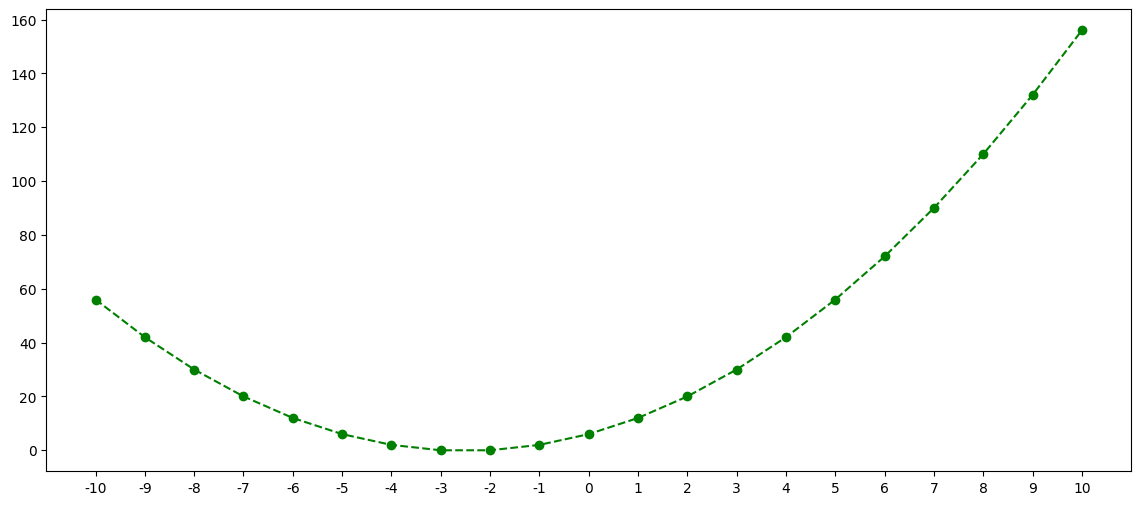

In [ ]:
# S3.2: Create a line plot for 'P(x) = x^2 + 5x + 6' for an array of values having range -10 to 10.
x=np.arange(-10,11)
plt.figure(figsize=(14,6))
plt.plot(x,exp8(x),'g--o')
plt.xticks(ticks=x,labels=x)
plt.show()


As we can observe from the output, the graph is created, which also has roots `[-3, -2]` where $P(x) = 0$.

The graph of the polynomial differ based on the type of polynomials. Let's study the types of polynomials in **Activity 4: Types of Polynomial and its Applications**



---

#### Activity 4: Types of Polynomial and its Applications

Polynomials are also categorised based on their degree. Following are the different types of polynomials:


|Polynomial|Degree|Polynomial Examples|
|----|----|--|
Linear Polynomial|1|$3x + 1$
Quadratic Polynomial|2|$x^2 + 5x + 6$
Cubic Polynomial|3|$-14x^3 + x^2 - 6$
Quartic Polynomial|4|$-7x^4 + 8x^2 - 120$

Let's take a look at each type along with their applications.

**1. Linear Polynomials:**

Linear polynomials also called first-degree polynomials are used to represent linear relations like the equation of a line $y = mx + c$.
The graph of linear polynomials, therefore, is always a straight line.

We have already seen these types of polynomials in Linear Regression where we can predict the value of an unknown item `y` at a particular `x` with coefficients `m` and `c`.

Real-world examples:
1. Prediction of income over time.
2. Prediction of speed over the distance covered and time.

Let's create a linear polynomial $P(x) = 5x + 5$ and print the roots of $P(x)$. Also, create a line plot for the range `-10` to `10`.




Polynomial:  
 
5 x + 5 
Roots: [-1.]


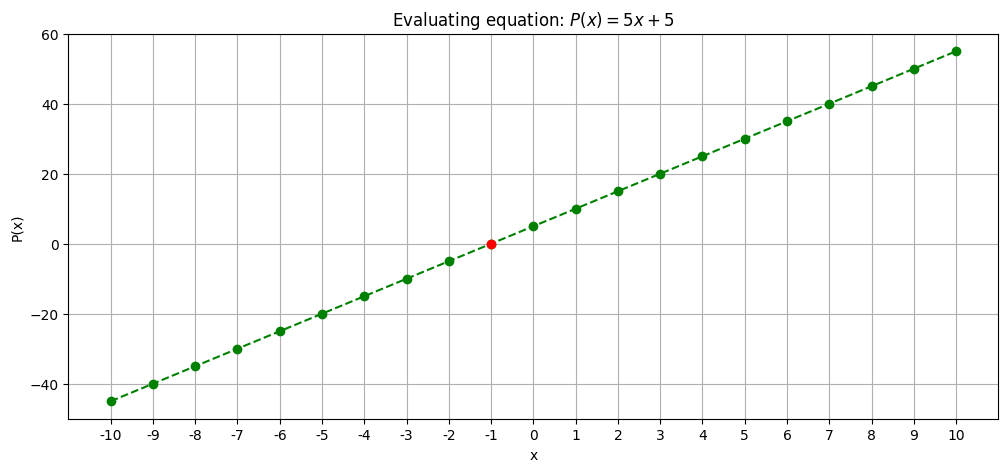

In [ ]:
# S4.1: Create a linear polynomial 'P(x) = 5x + 5'.
# Print its roots and plot graph for the 'P(x)' from -10 to 10.
lin_poly = np.poly1d([5, 5])
# Print the polynomial and its roots.
print(f"Polynomial:  \n{lin_poly} \nRoots: {lin_poly.r}")

# Create the 'x' array of range -10 to 10.
x = np.arange(-10, 11)

# Create the graph
plt.figure(figsize=(12,5))
plt.title(label = "Evaluating equation: $P(x) = 5x + 5$")
plt.plot(x, lin_poly(x), 'g--o')
plt.plot(int(lin_poly.r), lin_poly(int(lin_poly.r)), 'r--o')
plt.xlabel("x")
plt.ylabel("P(x)")
plt.xticks(ticks = x, labels = x )
plt.grid(True)
plt.show()

The graph in the above output is a straight line and at the root of the equation i.e. `-1`, $P(x)$ is `0`.

**2. Quadratic Polynomials:**

A quadratic polynomial is written in the form $ax² + bx + c$, where $a$, $b$, and $c$ are real numbers. These equations, graphically, represent parabolas, i.e. an arc or a curve.

Quadratic polynomials are the most commonly seen expressions in aspects of daily life, for example, when a ball is thrown in the air, an arc is formed which is a parabola. Where else are they used?

**Examples:**
1. The landing of a missile can be calculated with quadratic polynomials based on its launch because they too  form a parabola in the air.
2. The height above the sea level for the curved cables of the bridge can be calculated to pass a sailing ship within the parabolas.
3. Quadratic polynomials can also be used to design a single bend in the road.


Let's create and plot the quadratic polynomial $P(x) = x^2 + 5x + 6$ and print the roots of $P(x)$.


Polynomial:  
   2
1 x + 5 x + 6 
Roots: [-3. -2.]


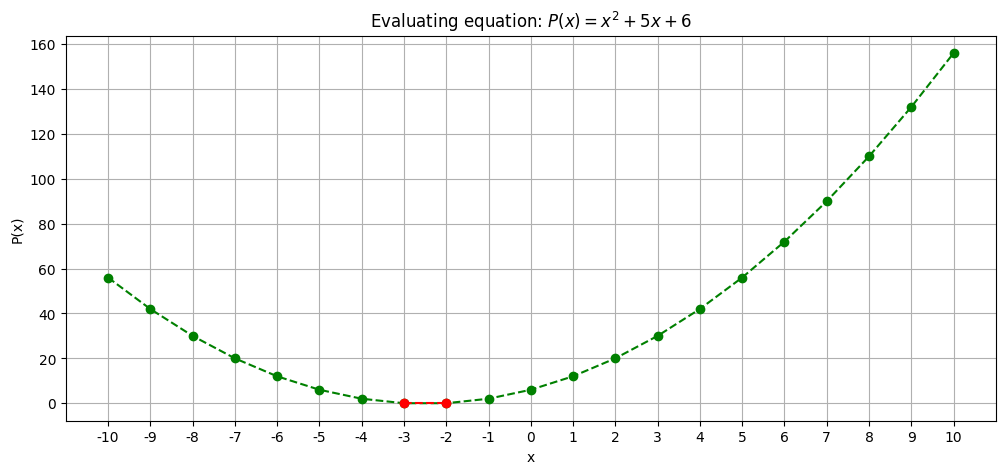

In [ ]:
# S4.2: Create a quadratic polynomial 'P(x) = x^2 + 5x + 6'.
# Print it's roots and plot graph for the 'P(x)' from -10 to 10.
q_poly = np.poly1d([1,5,6])
# Print the polynomial and its roots.
print(f"Polynomial:  \n{q_poly} \nRoots: {q_poly.r}")

# Create the 'x' array of range -10 to 10.
x = np.arange(-10, 11)

# Create the graph
plt.figure(figsize=(12,5))
plt.title(label = "Evaluating equation: $P(x) = x^2 + 5x + 6$")
plt.plot(x, q_poly(x), 'g--o')
plt.plot(q_poly.r, q_poly(q_poly.r), 'r--o')
plt.xlabel("x")
plt.ylabel("P(x)")
plt.xticks(ticks = x, labels = x )
plt.grid(True)
plt.show()

As we can observe, the graph above creates an arc for the quadratic polynomial.

**3. Cubic Polynomial:**

The Cubic Polynomial, written in the form $ax^3 + bx^2 + cx + d$ is used when there is a need to calculate or create curves. The graph of a cubic polynomial represents a wave.

Some of the applications of cubic polynomials are:
1. For calculating the dimensions of a swimming pool based on the given height and width.
2. For a road with multiple bends.

Let's create and plot a cubic polynomial $-7x^3 + 8x - 120$ and print the roots of $P(x)$.

Polynomial:  
    3
-7 x + 8 x - 120 
Roots: [-2.72605544+0.j          1.36302772+2.10491723j  1.36302772-2.10491723j]


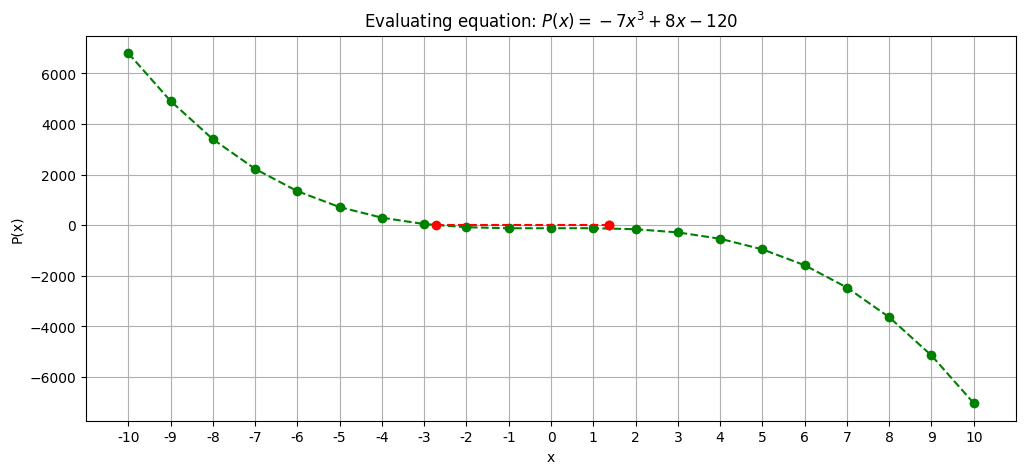

In [ ]:
# S4.3: Create a cubic polynomial 'P(x) = -7x^3 + 8x - 120'.
# Print it's roots and plot graph for the 'P(x)' from -10 to 10.
c_poly = np.poly1d([-7,0,8,-120])
# Print the polynomial and its roots.
print(f"Polynomial:  \n{c_poly} \nRoots: {c_poly.r}")

# Create the 'x' array of range -10 to 10.
x = np.arange(-10, 11)

# Create the graph
plt.figure(figsize=(12,5))
plt.title(label = "Evaluating equation: $P(x) = -7x^3 + 8x - 120$")
plt.plot(x, c_poly(x), 'g--o')
plt.plot(c_poly.r, c_poly(c_poly.r), 'r--o')
plt.xlabel("x")
plt.ylabel("P(x)")
plt.xticks(ticks = x, labels = x )
plt.grid(True)
plt.show()

As we can observe, the graph creates a wave for the cubic graph.

**Note:** The one or more roots of the cubic graph can be imaginary or real.

**4. High Order Polynomials:**

High order polynomials, with degree greater than 3 also represents a wave in the graphical form. They are used to design complex structures like:
1. A roller coaster
2. A path down the hill
3. A spherical staircase.

Let's create a high order polynomial $\frac{1}{5}x^5 - \frac{26}{3}x^3 + 25$ and print the roots of $P(x)$. Also, plot the graph for a range `-6` to `6`.


Polynomial:  
     5         3
0.2 x - 8.667 x + 25 
Roots: [ 6.54891521+0.j         -6.61551734+0.j          1.44721931+0.j
 -0.69030859+1.23170391j -0.69030859-1.23170391j]


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


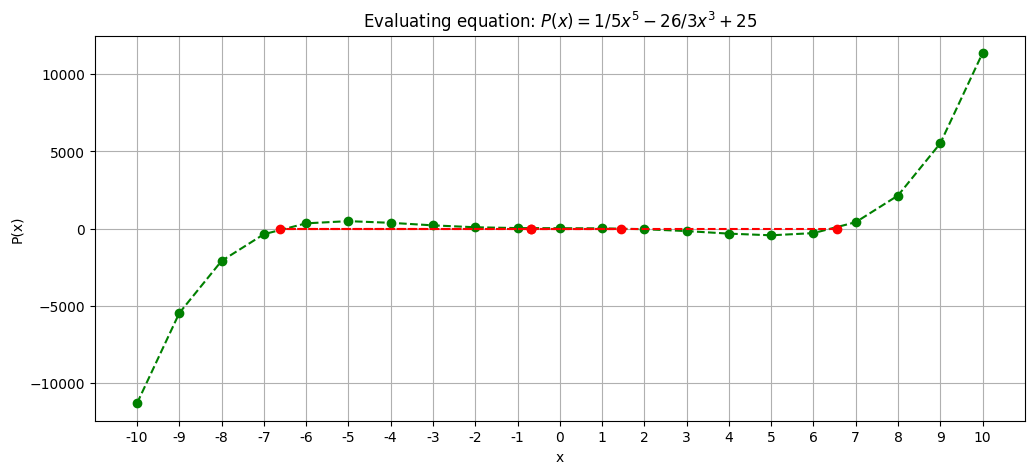

In [ ]:
# S4.4: Create a high order polynomial 'P(x) = 1/5x^5 - 26/3x^3 + 25'.
# Print it's roots and plot graph for the 'P(x)' from -6 to 6.
h_poly = np.poly1d([1/5,0,-26/3,0,0,25])
# Print the polynomial and its roots.
print(f"Polynomial:  \n{h_poly} \nRoots: {h_poly.r}")

# Create the 'x' array of range -10 to 10.
x = np.arange(-10, 11)

# Create the graph
plt.figure(figsize=(12,5))
plt.title(label = "Evaluating equation: $P(x) = 1/5x^5 - 26/3x^3 + 25$")
plt.plot(x, h_poly(x), 'g--o')
plt.plot(h_poly.r, h_poly(h_poly.r), 'r--o')
plt.xlabel("x")
plt.ylabel("P(x)")
plt.xticks(ticks = x, labels = x )
plt.grid(True)
plt.show()

As we can observe, the curve is created with multiple bends.

The shape or curve of the polynomial can help in better training the data for non-linear relations.

Let's stop here. In the next lesson we will learn about the effect of polynomials in Machine Learning Models and Polynomial Regression.

---

### **Project**
You can now attempt the **Applied Tech Project 103 - Polynomial Regression I** on your own.

**Applied Tech Project 103 - Polynomial Regression I**: https://colab.research.google.com/drive/1kvI-uUGQIu-LW_E03nER7wC_f2IsERY0

---